# ДЗ № 5
Применить средства автоматизации тестирования python для автоматического тестирования качества работы модели машинного обучения на различных датасетах.


## Установка pytest

In [118]:
!pip install pytest

## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from joblib import dump

## Генерация данных

In [2]:
# Генерация случайных данных
def dataset_generate(count=100, feature=3, random_seed=0, noise_k=0, coef = []):

  np.random.seed(random_seed)
  X = np.random.rand(count, feature)  # Создание матрицы признаков (100 наблюдений, 3 признака)
  if coef == []:
    true_coefficients = np.random.randint(1, 21, size=feature)  # Истинные коэффициенты модели
  else:
    true_coefficients = coef
  noise = np.random.randn(count) * noise_k  # Добавление случайного шума
  y = X.dot(true_coefficients) + noise  # Создание целевой переменной с учетом шума

  # Создание DataFrame
  columns_list = []
  for i in range(feature):
    columns_list.append(f'Feature{i+1}')
  df = pd.DataFrame(X, columns=columns_list)
  df['Target'] = y

  # Вывод первых 5 строк датасета
  print(df.head())
  print(f'Истинные коэффициенты: {true_coefficients}')

  # Создание фигуры и осей
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Визуализация каждого признака отдельно
  i=0
  for i in range(feature):
    axs[i].scatter(X[:, i], y, color='blue', alpha=0.5)
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Target')

  plt.tight_layout()
  plt.show()

  return df

   Feature1  Feature2  Feature3     Target
0  0.548814  0.715189  0.602763  17.740938
1  0.544883  0.423655  0.645894  14.509065
2  0.437587  0.891773  0.963663  21.385200
3  0.383442  0.791725  0.528895  16.653939
4  0.568045  0.925597  0.071036  16.716813
Истинные коэффициенты: [ 9 12  7]


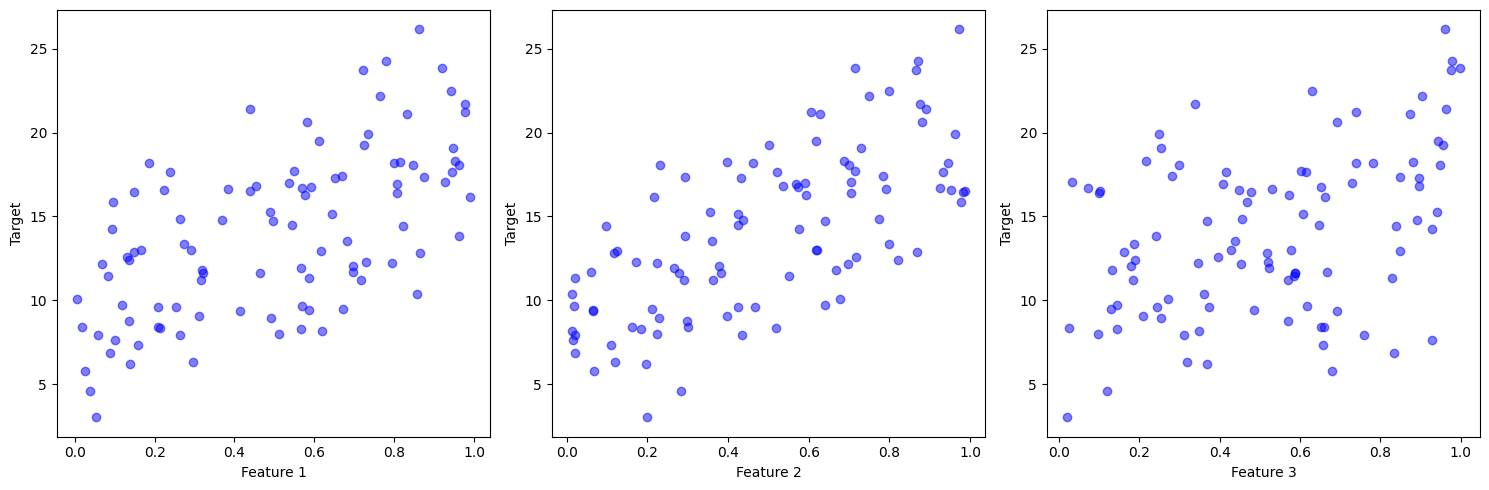

In [3]:
df = dataset_generate()

## Обучение модели

In [4]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Target'), df['Target'], test_size=0.2, random_state=0)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов модели
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Coefficients: [ 9. 12.  7.]
Intercept: -1.7763568394002505e-15
Mean Squared Error: 1.34106353887572e-29


In [5]:
# Сохранение модели в файл
dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

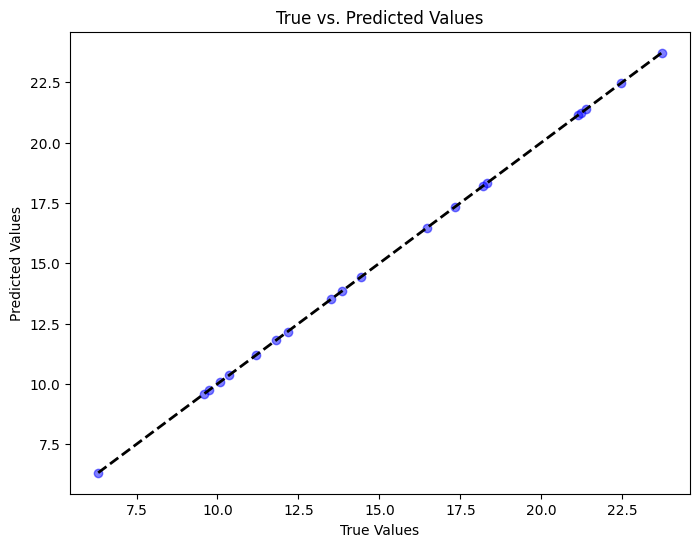

In [6]:
# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(8, 6))

# Визуализация истинных значений и предсказанных значений
ax.scatter(y_test, y_pred, color='blue', alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('True vs. Predicted Values')

plt.show()

## Гнерация еще двух не зашумленных датасетов и одного зашумленного

   Feature1  Feature2  Feature3     Target
0  0.417022  0.720324  0.000114  12.397893
1  0.302333  0.146756  0.092339   5.128434
2  0.186260  0.345561  0.396767   8.600443
3  0.538817  0.419195  0.685220  14.676221
4  0.204452  0.878117  0.027388  12.569193
Истинные коэффициенты: [9, 12, 7]


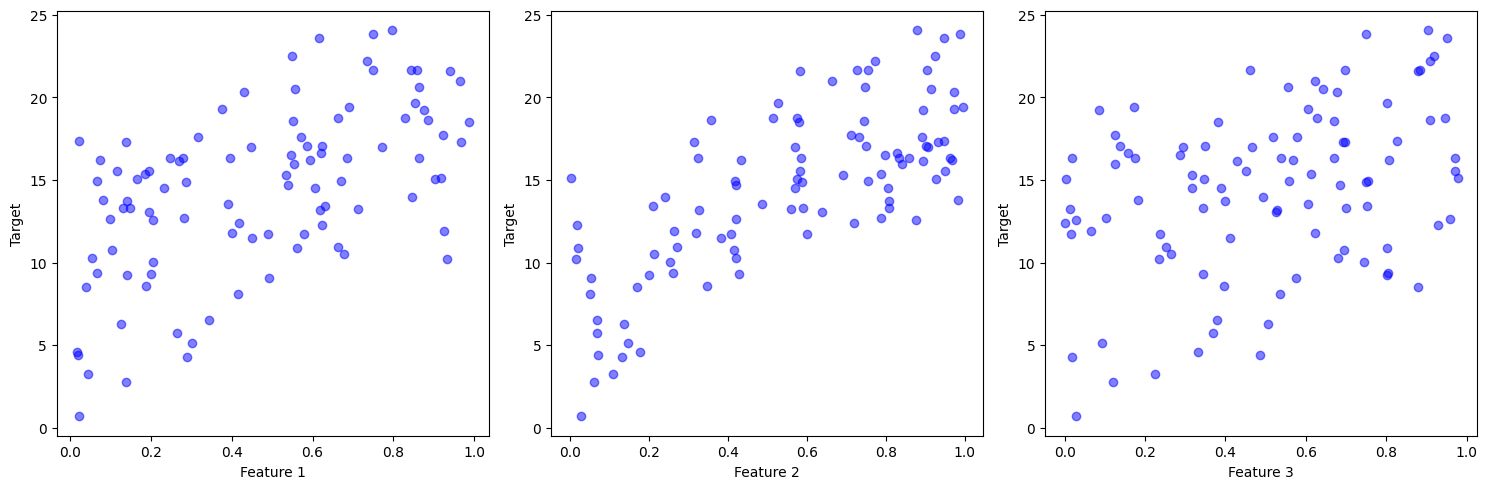

In [7]:
df1 = dataset_generate(random_seed=1, coef = [9, 12, 7])

   Feature1  Feature2  Feature3     Target
0  0.435995  0.025926  0.549662   8.082706
1  0.435322  0.420368  0.330335  11.274659
2  0.204649  0.619271  0.299655  11.370672
3  0.266827  0.621134  0.529142  13.559046
4  0.134580  0.513578  0.184440   8.665236
Истинные коэффициенты: [9, 12, 7]


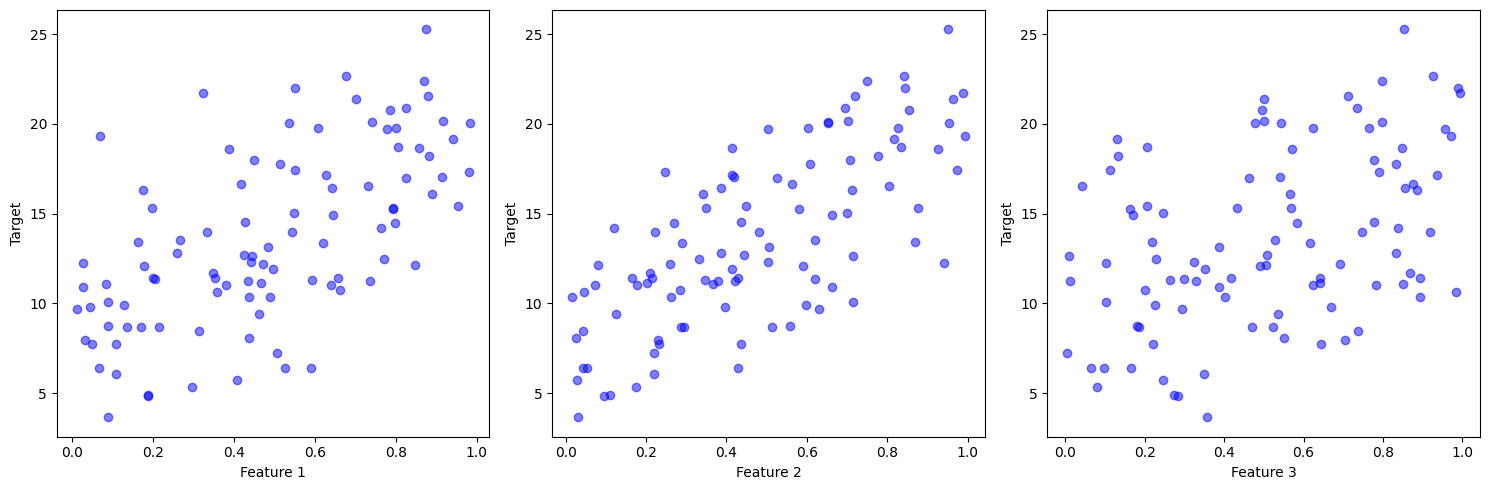

In [8]:
df2 = dataset_generate(random_seed=2, coef = [9, 12, 7])

   Feature1  Feature2  Feature3     Target
0  0.435995  0.025926  0.549662   8.000461
1  0.435322  0.420368  0.330335  10.969992
2  0.204649  0.619271  0.299655  11.210948
3  0.266827  0.621134  0.529142  14.107993
4  0.134580  0.513578  0.184440   8.046861
Истинные коэффициенты: [9, 12, 7]


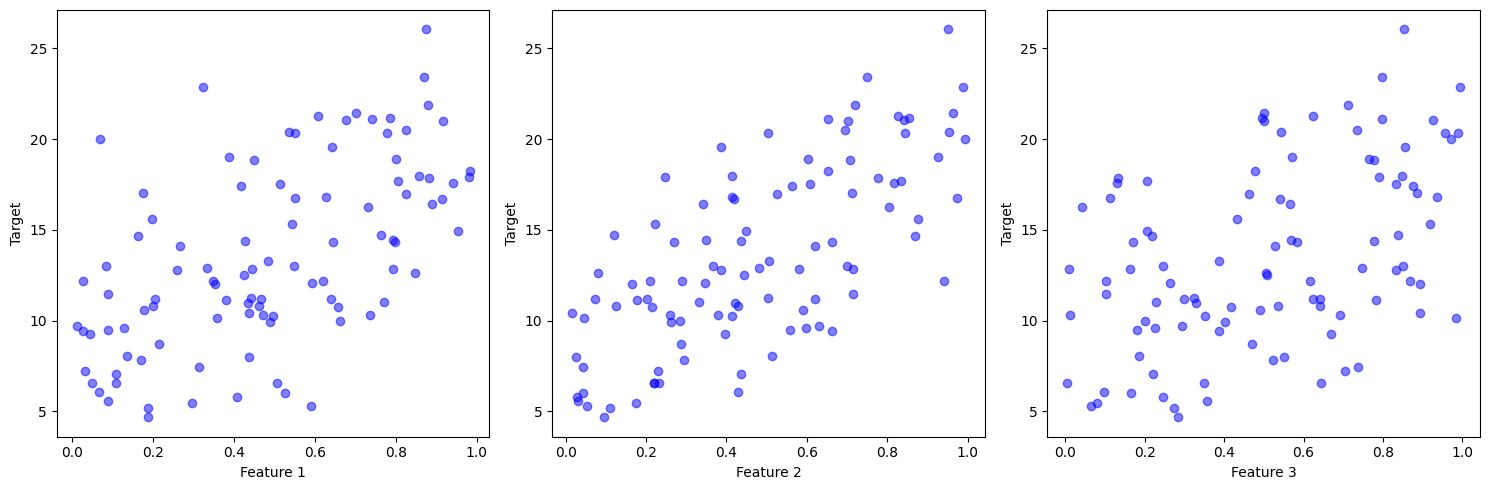

In [9]:
df3 = dataset_generate(random_seed=2, noise_k = 1, coef = [9, 12, 7])

In [10]:
df.to_csv('df', index = False)
df1.to_csv('df1', index = False)
df2.to_csv('df2', index = False)
df3.to_csv('df3', index = False)

## Файл тестирования

In [11]:
%%writefile test_datasets.py

# Ваш код с тестами здесь
import pandas as pd
from joblib import load
from sklearn.metrics import mean_squared_error

def test_dataset(df='df'):

  df = pd.read_csv(df)

  X_test = df.drop(columns='Target')
  y_test= df['Target']

  # Предсказание на тестовом наборе
  y_pred = model.predict(X_test)

  # Вычисление MSE
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)

  assert mse < 0.22, 'MSE превышает 0.22'

# Загрузка модели из файла
model = load('linear_regression_model.joblib')

test_dataset(df='df')
test_dataset(df='df1')
test_dataset(df='df2')
test_dataset(df='df3')


Writing test_datasets.py


## Тестирование

In [12]:
!pytest test_datasets.py

============================= test session starts =============================
platform win32 -- Python 3.11.8, pytest-8.1.1, pluggy-1.4.0
rootdir: d:\ML\Git\SergeyChashnikov\mlops_practice\lab5_pytest
plugins: anyio-4.3.0, hydra-core-1.3.2, time-machine-2.14.1
collected 0 items / 1 error

=================================== ERRORS ====================================
______________________ ERROR collecting test_datasets.py ______________________
test_datasets.py:29: in <module>
    test_dataset(df='df3')
test_datasets.py:21: in test_dataset
    assert mse < 0.22, 'MSE превышает 0.22'
E   AssertionError: MSE превышает 0.22
E   assert 0.9028282648337681 < 0.22
------------------------------- Captured stdout -------------------------------
Mean Squared Error: 1.185855155773486e-29
Mean Squared Error: 1.050023168655743e-29
Mean Squared Error: 1.008953097777674e-29
Mean Squared Error: 0.9028282648337681
=========================== short test summary info ===========================
ERROR 